<a href="https://colab.research.google.com/github/nazia-noor/nazia_data606/blob/master/modeling/modeling_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.0 MB/s 
     |████████████████████████████████| 4.7 MB 41.9 MB/s 
     |████████████████████████████████| 1.3 MB 32.3 MB/s 
     |████████████████████████████████| 101 kB 9.7 MB/s 
     |████████████████████████████████| 596 kB 42.9 MB/s 
     |████████████████████████████████| 6.6 MB 32.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=706dc8724f74defd708b8c4a6fbf85e5ab31ef52877eedade352e93903100c43
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
file_path = r'https://raw.githubusercontent.com/nazia-noor/nazia_data606/master/dataset/final_dataset.csv'

df= pd.read_csv(file_path)

In [ ]:
df["ingredients"].fillna("N/A", inplace = True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,name,price,product_details,ingredients,brand,product_amount,measurement_unit,product_type,product_size
0,image skincare ageless total resurfacing masqu...,39.0,a micro-exfoliating masque with alpha hydroxy ...,"aqua, alumina, glycolic acid, lactic acid, hel...",image skincare,59.15,gram,mask,standard
1,ahava dead sea osmoter concentrate supreme hyd...,75.0,"innovative, light-textured cream provides two ...","aqua (mineral spring water), isodecyl isononao...",ahava,50.00,gram,cream/lotion/moisturizer,standard
2,zelens tea shot urban defence serum 30ml,117.3,zelens’ tea shot urban defence serum helps to ...,"aqua (water), camellia sinensis leaf water, gl...",zelens,30.00,gram,serum,small
3,decorté aq lotion 6.7 fl. oz,95.0,"essential to the japanese layering-technique, ...","water/aqua/eau, butylene glycol, glycerin, alc...",decorté,198.14,gram,cream/lotion/moisturizer,standard
4,cetaphil rich night cream 50g,11.1,intensively moisturises and rehydrates to help...,"aqua, glycerin, petrolatum, dicaprylyl ether,d...",cetaphil,50.00,gram,cream/lotion/moisturizer,standard
...,...,...,...,...,...,...,...,...,...
2833,herbivore cloud jelly pink plumping hydration ...,62.1,the herbivore cloud jelly pink plumping hydrat...,"aqua/water/eau, aloe barbadensis leaf juice, g...",herbivore botanicals,30.00,gram,serum,small
2834,benton tea tree mist 80ml,26.3,"benton’s face mist is a soothing, moisturizing...","melaleuca alternifolia (tea tree) leaf water, ...",benton,80.00,gram,toner/essence/emulsion,standard
2835,algenist genius ultimate anti-aging eye cream ...,74.0,this vegan eye cream delivers unparalleled ben...,"water (aqua, eau), caprylic/capric triglycerid...",algenist,14.79,gram,eye,small
2836,bulldog original beard oil 30ml,7.6,condition your facial fuzz with the bulldog or...,"helianthus annuus (sunflower) seed oil, prunus...",bulldog skincare for men,30.00,gram,cream/lotion/moisturizer,small


# BERT MODEL

In [ ]:
def combine_features(row):
    return row['name']+' '+row['product_details']+' '+row['ingredients']+' '

In [ ]:
df['combined_value'] = df.apply(combine_features, axis = 1)

In [ ]:
df

,name,price,product_details,ingredients,brand,product_amount,measurement_unit,product_type,product_size,combined_value
0,image skincare ageless total resurfacing masqu...,39.0,a micro-exfoliating masque with alpha hydroxy ...,"aqua, alumina, glycolic acid, lactic acid, hel...",image skincare,59.15,gram,mask,standard,image skincare ageless total resurfacing masqu...
1,ahava dead sea osmoter concentrate supreme hyd...,75.0,"innovative, light-textured cream provides two ...","aqua (mineral spring water), isodecyl isononao...",ahava,50.00,gram,cream/lotion/moisturizer,standard,ahava dead sea osmoter concentrate supreme hyd...
2,zelens tea shot urban defence serum 30ml,117.3,zelens’ tea shot urban defence serum helps to ...,"aqua (water), camellia sinensis leaf water, gl...",zelens,30.00,gram,serum,small,zelens tea shot urban defence serum 30ml zelen...
3,decorté aq lotion 6.7 fl. oz,95.0,"essential to the japanese layering-technique, ...","water/aqua/eau, butylene glycol, glycerin, alc...",decorté,198.14,gram,cream/lotion/moisturizer,standard,decorté aq lotion 6.7 fl. oz essential to the ...
4,cetaphil rich night cream 50g,11.1,intensively moisturises and rehydrates to help...,"aqua, glycerin, petrolatum, dicaprylyl ether,d...",cetaphil,50.00,gram,cream/lotion/moisturizer,standard,cetaphil rich night cream 50g intensively mois...
...,...,...,...,...,...,...,...,...,...,...
2833,herbivore cloud jelly pink plumping hydration ...,62.1,the herbivore cloud jelly pink plumping hydrat...,"aqua/water/eau, aloe barbadensis leaf juice, g...",herbivore botanicals,30.00,gram,serum,small,herbivore cloud jelly pink plumping hydration ...
2834,benton tea tree mist 80ml,26.3,"benton’s face mist is a soothing, moisturizing...","melaleuca alternifolia (tea tree) leaf water, ...",benton,80.00,gram,toner/essence/emulsion,standard,benton tea tree mist 80ml benton’s face mist i...
2835,algenist genius ultimate anti-aging eye cream ...,74.0,this vegan eye cream delivers unparalleled ben...,"water (aqua, eau), caprylic/capric triglycerid...",algenist,14.79,gram,eye,small,algenist genius ultimate anti-aging eye cream ...
2836,bulldog original beard oil 30ml,7.6,condition your facial fuzz with the bulldog or...,"helianthus annuus (sunflower) seed oil, prunus...",bulldog skincare for men,30.00,gram,cream/lotion/moisturizer,small,bulldog original beard oil 30ml condition your...


I will choose the top 5 categories to show the result of BERT model.

In [ ]:
df["product_type"].value_counts()

cream/lotion/moisturizer    831
cleanser                    457
serum                       343
toner/essence/emulsion      278
mask                        273
eye                         250
treatment                   159
lip                         109
spf                          94
exfoliant                    44
Name: product_type, dtype: int64

In [ ]:
df_cream= df.loc[df['product_type'] == "cream/lotion/moisturizer"]
df_cleanser= df.loc[df['product_type'] == "cleanser"]
df_serum= df.loc[df['product_type'] == "serum"]
df_toner= df.loc[df['product_type'] == "toner/essence/emulsion"]
df_mask= df.loc[df['product_type'] == "mask"]

In [ ]:
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

### CREAM PRODUCT CATEGORY

In [ ]:
df_cream.reset_index(drop=True, inplace=True)

In [ ]:
df_cream = df_cream.reset_index(drop=False)

In [ ]:
pd.set_option("display.max_colwidth", -1)
df_cream.nlargest(1, columns=['price'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,index,name,price,product_details,ingredients,brand,product_amount,measurement_unit,product_type,product_size,combined_value
768,768,111skin celestial black diamond cream 50ml,995.0,"ideal for skin types with advanced signs of ageing, 111skin’s celestial black diamond cream combines a luxurious formulation with innovative technology.\n\n the premium moisturiser boasts concentrated black diamond particles, aiding the delivery of active ingredients. supporting and optimising the skin’s production of collagen and hyaluronic acid, the cream promotes a plumped, dewy and youthful-looking visage.\n\n nac y2 provides antioxidant protection, helping to shield the skin from the damaging effects of environmental aggressors. brightening ingredients work to reduce the appearance of hyperpigmentation and dark spots, helping to reveal a more even, radiant complexion. the rich texture provides a nourishing emollient barrier to help prevent moisture loss.\n\n discover a smoother, softer, firmer and more youthful-looking visage thanks to the power of precious black diamonds.","aqua/water, isopropyl myristate, glyceryl stearate se, hydrogenated palm oil, caprylic/capric tryglyceride, hydrogenated jojoba oil, gycerin, cetearyl alcohol, ceteareth-25, peg-100 stearate, sodium ascorbyl phosphate, benzyl alchohol, arbutin, acetyl cysteine (nac), aesculus hippocastanum extract, zinc oxide, centella asiatica extract, hyaluronic acid, diamond powder, peg-7 hydrogenated castor oil, polysorbate 20, tocopherol, retinyl plamitate, linoleic acid, xantham gum, aroma/parfum.",111skin,50.0,gram,cream/lotion/moisturizer,standard,"111skin celestial black diamond cream 50ml ideal for skin types with advanced signs of ageing, 111skin’s celestial black diamond cream combines a luxurious formulation with innovative technology.\n\n the premium moisturiser boasts concentrated black diamond particles, aiding the delivery of active ingredients. supporting and optimising the skin’s production of collagen and hyaluronic acid, the cream promotes a plumped, dewy and youthful-looking visage.\n\n nac y2 provides antioxidant protection, helping to shield the skin from the damaging effects of environmental aggressors. brightening ingredients work to reduce the appearance of hyperpigmentation and dark spots, helping to reveal a more even, radiant complexion. the rich texture provides a nourishing emollient barrier to help prevent moisture loss.\n\n discover a smoother, softer, firmer and more youthful-looking visage thanks to the power of precious black diamonds. aqua/water, isopropyl myristate, glyceryl stearate se, hydrogenated palm oil, caprylic/capric tryglyceride, hydrogenated jojoba oil, gycerin, cetearyl alcohol, ceteareth-25, peg-100 stearate, sodium ascorbyl phosphate, benzyl alchohol, arbutin, acetyl cysteine (nac), aesculus hippocastanum extract, zinc oxide, centella asiatica extract, hyaluronic acid, diamond powder, peg-7 hydrogenated castor oil, polysorbate 20, tocopherol, retinyl plamitate, linoleic acid, xantham gum, aroma/parfum."


We have sorted the dataframe to get the most expensive products' name

In [ ]:
#Get Embeddings
sentence_embeddings_cream = bert.encode(df_cream['combined_value'].tolist())

In [ ]:
sentence_embeddings_cream

array([[-0.57629967,  0.41007346, -0.38048184, ..., -0.34877905,
        -0.5152466 ,  0.00371601],
       [-0.825935  ,  0.7358177 , -0.16246155, ...,  0.32068968,
        -0.72279775, -0.0736497 ],
       [-0.657574  ,  0.66533923,  0.21159765, ...,  0.27012116,
        -0.1908056 ,  0.41825232],
       ...,
       [-0.57795554,  0.35097048,  0.69068164, ...,  0.5269691 ,
        -0.577105  ,  0.1370022 ],
       [-0.51491374,  1.0704098 , -0.11898253, ...,  0.2647373 ,
        -0.17712024,  0.42847484],
       [-0.6641092 ,  0.6980911 , -0.19589244, ...,  0.15999496,
        -0.06115269,  0.46326372]], dtype=float32)

In [ ]:
similarity_cream = cosine_similarity(sentence_embeddings_cream)

In [ ]:
similarity_cream

array([[1.        , 0.80801845, 0.7921723 , ..., 0.80614686, 0.8384794 ,
        0.8092229 ],
       [0.80801845, 1.        , 0.74992335, ..., 0.7675869 , 0.80957747,
        0.7894795 ],
       [0.7921723 , 0.74992335, 0.9999999 , ..., 0.73660135, 0.85279185,
        0.8770842 ],
       ...,
       [0.80614686, 0.7675869 , 0.73660135, ..., 0.9999999 , 0.8312024 ,
        0.77909696],
       [0.8384794 , 0.80957747, 0.85279185, ..., 0.8312024 , 1.0000001 ,
        0.90733284],
       [0.8092229 , 0.7894795 , 0.8770842 , ..., 0.77909696, 0.90733284,
        0.99999964]], dtype=float32)

In [ ]:
def product_price(index):
    return df_cream[df_cream.index == index]["price"].values[0]
def product_name(index):
    return df_cream[df_cream.index == index]["name"].values[0]
def index_product(name):
    return df_cream[df_cream.name == name]["index"].values[0]
  

In [ ]:
product_price(768)

995.0

In [ ]:
# got the name from the sorted dataframe. I have selected the most expensive serum
name = '111skin celestial black diamond cream 50ml'

In [ ]:
product_recommendation = sorted(list(enumerate(similarity_cream[index_product(name)])), key = lambda x:x[1], reverse = True)

In [ ]:
product_recommendation

[(768, 1.0000001),
 (511, 0.8951392),
 (656, 0.8911915),
 (720, 0.87390995),
 (386, 0.8737095),
 (354, 0.8671596),
 (671, 0.8665311),
 (77, 0.8653569),
 (605, 0.8652555),
 (123, 0.8610579),
 (513, 0.8607983),
 (193, 0.860281),
 (72, 0.8602645),
 (617, 0.8589825),
 (504, 0.857117),
 (510, 0.8570185),
 (233, 0.8559137),
 (247, 0.85517204),
 (175, 0.8551066),
 (172, 0.8542733),
 (135, 0.85379064),
 (691, 0.8532752),
 (545, 0.8515903),
 (449, 0.84945637),
 (18, 0.849363),
 (213, 0.84931767),
 (749, 0.84840643),
 (222, 0.84659946),
 (90, 0.84619236),
 (494, 0.8455153),
 (815, 0.8449166),
 (21, 0.84472007),
 (577, 0.8441573),
 (148, 0.8439693),
 (163, 0.84333324),
 (110, 0.842156),
 (13, 0.841687),
 (698, 0.84135896),
 (620, 0.8412618),
 (50, 0.84095204),
 (641, 0.83988196),
 (46, 0.8398032),
 (551, 0.8396386),
 (352, 0.8388723),
 (318, 0.83846396),
 (469, 0.8377756),
 (191, 0.8376266),
 (257, 0.8367856),
 (550, 0.8365661),
 (426, 0.83656585),
 (269, 0.83590186),
 (55, 0.8354763),
 (793, 0.8

In [ ]:
print("The top 5 option for '111skin celestial black diamond cream 50ml' cream are-",((product_name(product_recommendation[1][0])),"price", (product_price(product_recommendation[1][0]))),((product_name(product_recommendation[2][0])),"price", (product_price(product_recommendation[2][0]))),((product_name(product_recommendation[3][0])),"price", (product_price(product_recommendation[3][0]))),((product_name(product_recommendation[4][0])),"price", (product_price(product_recommendation[4][0]))),((product_name(product_recommendation[5][0])),"price", (product_price(product_recommendation[5][0]))),sep = "\n")

The top 5 option for '111skin celestial black diamond cream 50ml' cream are-
('rodial pink diamond magic gel 50ml', 'price', 85.0)
('prai platinum firm & lift crème 1.7 fl oz', 'price', 45.0)
('bella aurora bella multi-perfection day cream combination-oily skin 50ml', 'price', 41.4)
('bella aurora splendor 10 anti-ageing global day cream 50+ 50ml', 'price', 48.3)
('bella aurora splendor 10 anti-ageing total regeneration night cream 50+ 50ml', 'price', 48.3)


### CLEANSER PRODUCT CATEGORY

In [ ]:
df_cleanser.reset_index(drop=True, inplace=True)

In [ ]:
df_cleanser = df_cleanser.reset_index(drop=False)

In [ ]:
df_cleanser.nlargest(2, columns=['price'])

,index,name,price,product_details,ingredients,brand,product_amount,measurement_unit,product_type,product_size,combined_value
314,314,neocutis micro night riche rejuvenating balm 50ml,195.0,"keep skin hydrated around the clock with neocutis micro night riche rejuvenating balm, a nourishing overnight treatment that delivers visible anti-aging results. powered by a micro protein complex to combat loss of density and tone, the night balm works to restore radiance and smoothness while you sleep, using glycerin to replenish vital moisture.\n\n the weightless, silky formula helps to plump out the appearance of fine lines and wrinkles, improve elasticity and protect against the effects of climate and hormonal changes for a youthful and radiant finish.\n\n suitable for all skin types.\n\n free from synthetic colors and fragrances.\n\n not tested on animals.","water (aqua, eau), glyceryl stearate, ceteareth-20, petrolatum, octyldodecanol, hydrogenated polyisobutene, dimethicone, decyl oleate, propylene glycol, glycerin, triticum vulgare (wheat) germ oil, stearic acid, cetyl alcohol, tetrapeptide-21, capryloyl carnosine, palmitoyl tripeptide-1 acetate, tocopherol acetate, dioscorea villosa (wild yam) root extract, carbomer, ceteareth-12, cetearyl alcohol, cetyl palmitate, borago officinalis seed oil, myreth-3 myristate, butylene glycol, disodium edta, sodium hydroxide, sodium methylparaben, phenoxyethanol, bht, methylparaben, ethylparaben, ascorbyl palmitate, propylparaben.",neocutis,48.19,gram,cleanser,standard,"neocutis micro night riche rejuvenating balm 50ml keep skin hydrated around the clock with neocutis micro night riche rejuvenating balm, a nourishing overnight treatment that delivers visible anti-aging results. powered by a micro protein complex to combat loss of density and tone, the night balm works to restore radiance and smoothness while you sleep, using glycerin to replenish vital moisture.\n\n the weightless, silky formula helps to plump out the appearance of fine lines and wrinkles, improve elasticity and protect against the effects of climate and hormonal changes for a youthful and radiant finish.\n\n suitable for all skin types.\n\n free from synthetic colors and fragrances.\n\n not tested on animals. water (aqua, eau), glyceryl stearate, ceteareth-20, petrolatum, octyldodecanol, hydrogenated polyisobutene, dimethicone, decyl oleate, propylene glycol, glycerin, triticum vulgare (wheat) germ oil, stearic acid, cetyl alcohol, tetrapeptide-21, capryloyl carnosine, palmitoyl tripeptide-1 acetate, tocopherol acetate, dioscorea villosa (wild yam) root extract, carbomer, ceteareth-12, cetearyl alcohol, cetyl palmitate, borago officinalis seed oil, myreth-3 myristate, butylene glycol, disodium edta, sodium hydroxide, sodium methylparaben, phenoxyethanol, bht, methylparaben, ethylparaben, ascorbyl palmitate, propylparaben."
2,2,omorovicza thermal cleansing balm supersize -100ml (worth $220),180.0,"with multiple awards, the omorovicza thermal cleansing balm works to purify your skin. the powerful yet gentle formula will effectively remove all traces of make-up, including waterproof mascara, whilst caring for the skin and ensuring that essential ingredients are not lost. your skin will be left soft, smooth and supple thanks to the delicate mix of natural, hydrating ingredients. \n\n the black balm features hungarian moor mud which works to detoxify your skin by drawing out any impurities that are clogging up your pores whilst almond oil replenishes the moisture levels in your skin. enriched with a high concentration of minerals such as calcium, zinc, copper and magnesium the cleansing balm helps to improve the production of collagen, to strengthen the skin barrier and to fight against free radicals. infused with the pannon complex, unique to omorovicza, the cleansing balm will help your skin absorb the skin-friendly ingredients therefore enhancing your complexion’s overall appearance. appropriate for all skin types. a.b.\n\n dire

We have sorted the dataframe to get the most expensive products' name

In [ ]:
#Get Embeddings
sentence_embeddings_cleanser = bert.encode(df_cleanser['combined_value'].tolist())

In [ ]:
sentence_embeddings_cleanser

array([[-0.5293363 ,  0.9169159 ,  0.03675362, ...,  0.36673406,
         0.02575436,  0.40111855],
       [-0.5995743 ,  0.6247374 ,  0.13039088, ...,  0.09713076,
        -0.5016045 ,  0.58095545],
       [-0.86305434,  1.0262727 , -0.4735414 , ..., -0.35142466,
        -0.46765348,  0.43471128],
       ...,
       [-0.7845813 ,  0.726374  ,  0.02311911, ...,  0.1333474 ,
        -0.0961204 ,  0.4065291 ],
       [-0.31002802,  0.8449489 , -0.38757035, ..., -0.34520507,
        -0.19045067,  0.3134145 ],
       [-0.63494647,  0.66662115,  0.02837445, ...,  0.09936828,
        -0.35309687,  0.39072213]], dtype=float32)

In [ ]:
similarity_cleanser = cosine_similarity(sentence_embeddings_cleanser)

In [ ]:
similarity_cleanser

array([[1.        , 0.8398098 , 0.8482729 , ..., 0.8645457 , 0.71502864,
        0.8879501 ],
       [0.8398098 , 1.        , 0.7920485 , ..., 0.7800395 , 0.7179338 ,
        0.8299627 ],
       [0.8482729 , 0.7920485 , 0.9999998 , ..., 0.8767551 , 0.82033515,
        0.87573326],
       ...,
       [0.8645457 , 0.7800395 , 0.8767551 , ..., 0.9999999 , 0.82644403,
        0.8779849 ],
       [0.71502864, 0.7179338 , 0.82033515, ..., 0.82644403, 1.0000001 ,
        0.8193835 ],
       [0.8879501 , 0.8299627 , 0.87573326, ..., 0.8779849 , 0.8193835 ,
        0.99999976]], dtype=float32)

In [ ]:
def product_price(index):
    return df_cleanser[df_cleanser.index == index]["price"].values[0]
def product_name(index):
    return df_cleanser[df_cleanser.index == index]["name"].values[0]
def index_product(name):
    return df_cleanser[df_cleanser.name == name]["index"].values[0]
  

In [ ]:
product_price(2)

180.0

In [ ]:
# got the name from the sorted dataframe. I have selected the 2rd most expensive cleanser
name = 'omorovicza thermal cleansing balm supersize -100ml (worth $220)'

In [ ]:
product_recommendation = sorted(list(enumerate(similarity_cleanser[index_product(name)])), key = lambda x:x[1], reverse = True)

In [ ]:
product_recommendation

[(2, 0.9999998),
 (132, 0.9109005),
 (79, 0.90767765),
 (361, 0.90520394),
 (300, 0.904781),
 (202, 0.9029244),
 (42, 0.90200365),
 (207, 0.9016925),
 (351, 0.9009489),
 (102, 0.9002998),
 (307, 0.8990193),
 (83, 0.8969643),
 (118, 0.8967763),
 (449, 0.8967382),
 (225, 0.8963848),
 (311, 0.8962983),
 (17, 0.8940898),
 (423, 0.8934486),
 (76, 0.8934335),
 (293, 0.89332265),
 (260, 0.8931737),
 (199, 0.8918335),
 (280, 0.89112854),
 (377, 0.8909856),
 (273, 0.8899918),
 (339, 0.88850486),
 (327, 0.8882519),
 (323, 0.887715),
 (160, 0.8875635),
 (223, 0.8870256),
 (338, 0.8867098),
 (67, 0.88660336),
 (134, 0.8865133),
 (82, 0.88589954),
 (392, 0.8846822),
 (382, 0.8843179),
 (309, 0.8834639),
 (321, 0.88321126),
 (234, 0.8821511),
 (200, 0.88171583),
 (291, 0.8816255),
 (148, 0.8812324),
 (80, 0.88101476),
 (126, 0.88046867),
 (94, 0.8797601),
 (41, 0.87974715),
 (220, 0.87893915),
 (184, 0.8784076),
 (121, 0.8781605),
 (218, 0.8776585),
 (336, 0.8774432),
 (110, 0.87719333),
 (78, 0.877

In [ ]:
print("The top 5 option for 'omorovicza thermal cleansing balm supersize -100ml (worth $220)' cleanser are-",((product_name(product_recommendation[1][0])),"price", (product_price(product_recommendation[1][0]))),((product_name(product_recommendation[2][0])),"price", (product_price(product_recommendation[2][0]))),((product_name(product_recommendation[3][0])),"price", (product_price(product_recommendation[3][0]))),((product_name(product_recommendation[4][0])),"price", (product_price(product_recommendation[4][0]))),((product_name(product_recommendation[5][0])),"price", (product_price(product_recommendation[5][0]))),sep = "\n")

The top 5 option for 'omorovicza thermal cleansing balm supersize -100ml (worth $220)' cleanser are-
('dcl skincare active mattifying cleanser 125ml', 'price', 34.5)
('merci handy magic plants facial cleansing stick 30g', 'price', 15.0)
('mádara micellar water 100ml', 'price', 17.9)
('balmonds hand sanitiser gel 100ml', 'price', 11.1)
('neutrogena hydro boost triple micellar water 400ml', 'price', 11.4)


### SERUM PRODUCT CATEGORY

In [ ]:
df_serum.reset_index(drop=True, inplace=True)

In [ ]:
df_serum = df_serum.reset_index(drop=False)

In [ ]:
df_serum.nlargest(3, columns=['price'])

,index,name,price,product_details,ingredients,brand,product_amount,measurement_unit,product_type,product_size,combined_value
152,152,111skin celestial black diamond serum 1.01 oz,600.0,"this incredibly powerful serum is a more intensive version of the original y theorem serum. the formula melts effortlessly into skin while the black diamond particles aid deeper delivery of active ingredients. this serum helps to improve firmness and elasticity by encouraging collagen and elastin production in the skin. the serum is a powerful solution for hyperpigmentation, discoloration and uneven skin tone. hydrate, volumize, smooth, brighten, and even the complexion with this intensive serum.","aqua / water / eau, glycerin, alcohol, sorbitol, isopropyl myristate, benzyl alcohol, aloe barbadensis (aloe vera) leaf extract, polysorbate 20, retinyl palmitate, tocopherol, linoleic acid, sodium hyaluronate, carbomer, sodium hydroxide, caproic acid, aesculus hippocastanum (horse chestnut / marron) seed extract, sodium ascorbyl phosphate, xanthan gum, glycyrrhiza glabra (liquorice / réglisse) root extract, prunus armeniaca (apricot / abricot) kernel oil, acetyl cysteine, tannic acid, centella asiatica extract, diamond powder, fragrance / parfum.",111skin,28.63,gram,serum,small,"111skin celestial black diamond serum 1.01 oz this incredibly powerful serum is a more intensive version of the original y theorem serum. the formula melts effortlessly into skin while the black diamond particles aid deeper delivery of active ingredients. this serum helps to improve firmness and elasticity by encouraging collagen and elastin production in the skin. the serum is a powerful solution for hyperpigmentation, discoloration and uneven skin tone. hydrate, volumize, smooth, brighten, and even the complexion with this intensive serum. aqua / water / eau, glycerin, alcohol, sorbitol, isopropyl myristate, benzyl alcohol, aloe barbadensis (aloe vera) leaf extract, polysorbate 20, retinyl palmitate, tocopherol, linoleic acid, sodium hyaluronate, carbomer, sodium hydroxide, caproic acid, aesculus hippocastanum (horse chestnut / marron) seed extract, sodium ascorbyl phosphate, xanthan gum, glycyrrhiza glabra (liquorice / réglisse) root extract, prunus armeniaca (apricot / abricot) kernel oil, acetyl cysteine, tannic acid, centella asiatica extract, diamond powder, fragrance / parfum."
80,80,révive intensité complete anti-aging serum 30ml,485.0,"inspired by skin volume and line relaxing research to address multiple aging concerns in one powerful, lightweight and highly effective facial serum.","aqua (water, eau), propanediol, glycerin, peg-6, glyceryl ascorbate, butylene glycol, saccharomyces/xylinum/black tea ferment, ethoxydiglycol, oligopeptide-24, oligopeptide-41, palmitoyl tripeptide-5, acetyl hexapeptide-8, palmitoyl tripeptide-1, palmitoyl tetrapeptide-7, artemisia abrotanum extract, s-mu-conotoxin cniiic acetate, biotin, tocopheryl acetate, sodium hyaluronate, panthenol, tocopherol, glycine soja (soybean) oil, sodium oleate, hydrogenated lecithin, ammonium acryloyldimethyltaurate/carboxyethyl acrylate crosspolymer, gallic acid, dimethicone/vinyl dimethicone crosspolymer, hydroxyethylcellulose, silica, carbomer, isoceteth-10, sodium lactate, t-butyl alcohol, potassium sorbate, polysorbate 20, sodium citrate, parfum (fragrance), phenoxyethanol, citric acid, mica, disodium edta, synthetic fluorphlogopite, tin oxide, citronellol, limonene, linalool, hexyl cinnamal, ci 77891 (titanium dioxide), ci 60730 (ext. violet 2)",révive,30.00,gram,serum,small,"révive intensité complete anti-aging serum 30ml inspired by skin volume and line relaxing research to address multiple aging concerns in one powerful, lightweight and highly effective facial serum. aqua (water, eau), propanediol, glycerin, peg-6, glyceryl ascorbate, butylene glycol, saccharomyces/xylinum/black tea ferment, ethoxydiglycol, oligopeptide-24, oligopeptide-41, palmitoyl tripeptide-5, acetyl hexapeptide-8, palmitoy

We have sorted the dataframe to get the most expensive products' name

In [ ]:
#Get Embeddings
sentence_embeddings_serum = bert.encode(df_serum['combined_value'].tolist())

In [ ]:
sentence_embeddings_serum

array([[-0.6858258 ,  0.32077864, -0.05096824, ..., -0.01006611,
        -0.41560492,  0.0326242 ],
       [-0.59948874,  0.37662536, -0.4588796 , ..., -0.2026483 ,
        -0.18295765,  0.23298027],
       [-1.1079891 ,  0.5781362 , -0.43012106, ...,  0.41026524,
        -0.23150143,  0.16139156],
       ...,
       [-0.674359  ,  0.4828935 , -0.247211  , ..., -0.1551387 ,
         0.15436672,  0.5036819 ],
       [-0.720752  ,  0.50367844,  0.13723628, ..., -0.06714905,
         0.01891309,  0.4996524 ],
       [-0.791163  ,  0.3525999 , -0.1908297 , ...,  0.90761024,
        -0.09097318,  0.6469477 ]], dtype=float32)

In [ ]:
similarity_serum= cosine_similarity(sentence_embeddings_serum)

In [ ]:
similarity_serum


array([[1.0000002 , 0.8775142 , 0.83181983, ..., 0.81612355, 0.6726527 ,
        0.79810524],
       [0.8775142 , 1.0000001 , 0.8428099 , ..., 0.89431834, 0.7348254 ,
        0.8830286 ],
       [0.83181983, 0.8428099 , 0.9999998 , ..., 0.81567407, 0.71332085,
        0.8663927 ],
       ...,
       [0.81612355, 0.89431834, 0.81567407, ..., 1.0000001 , 0.6986737 ,
        0.853621  ],
       [0.6726527 , 0.7348254 , 0.71332085, ..., 0.6986737 , 0.9999999 ,
        0.73149866],
       [0.79810524, 0.8830286 , 0.8663927 , ..., 0.853621  , 0.73149866,
        0.9999999 ]], dtype=float32)

In [ ]:
def product_price(index):
    return df_serum[df_serum.index == index]["price"].values[0]
def product_name(index):
    return df_serum[df_serum.index == index]["name"].values[0]
def index_product(name):
    return df_serum[df_serum.name == name]["index"].values[0]
  

In [ ]:
# got the name from the sorted dataframe. I have selected the 3rd most expensive serum 
name = 'mila moursi lifting serum 1 fl. oz'

In [ ]:
product_price(198)

440.0

In [ ]:
product_recommendation = sorted(list(enumerate(similarity_serum[index_product(name)])), key = lambda x:x[1], reverse = True)

In [ ]:
product_recommendation

[(198, 0.9999999),
 (173, 0.9260978),
 (29, 0.91829085),
 (274, 0.9162159),
 (247, 0.9083062),
 (80, 0.90745616),
 (123, 0.9074305),
 (46, 0.9003081),
 (117, 0.89930546),
 (315, 0.8941349),
 (295, 0.88814884),
 (293, 0.8820643),
 (18, 0.8809527),
 (212, 0.8806548),
 (321, 0.8805617),
 (298, 0.8799744),
 (336, 0.8796357),
 (242, 0.8791598),
 (194, 0.87858295),
 (261, 0.87795),
 (319, 0.877835),
 (235, 0.87567157),
 (111, 0.8751235),
 (37, 0.8748142),
 (338, 0.8743071),
 (241, 0.8712738),
 (141, 0.87104595),
 (13, 0.8710014),
 (87, 0.8704603),
 (66, 0.86989963),
 (25, 0.8689612),
 (287, 0.8680649),
 (166, 0.8675296),
 (99, 0.8671266),
 (146, 0.86602336),
 (231, 0.86581093),
 (251, 0.8651972),
 (246, 0.86513776),
 (72, 0.86484134),
 (154, 0.86421925),
 (151, 0.86410743),
 (91, 0.86398625),
 (159, 0.8639567),
 (109, 0.863937),
 (268, 0.86384934),
 (225, 0.8636141),
 (317, 0.86282575),
 (36, 0.86223316),
 (8, 0.8619408),
 (188, 0.8618448),
 (175, 0.86078835),
 (245, 0.8607068),
 (233, 0.860

In [ ]:
print("The top 5 option for 'mila moursi lifting serum 1 fl. oz' serum are-",((product_name(product_recommendation[1][0])),"price", (product_price(product_recommendation[1][0]))),((product_name(product_recommendation[2][0])),"price", (product_price(product_recommendation[2][0]))),((product_name(product_recommendation[3][0])),"price", (product_price(product_recommendation[3][0]))),((product_name(product_recommendation[4][0])),"price", (product_price(product_recommendation[4][0]))),((product_name(product_recommendation[5][0])),"price", (product_price(product_recommendation[5][0]))),sep = "\n")

The top 5 option for 'mila moursi lifting serum 1 fl. oz' serum are-
('mila moursi rejuvenating serum 1 fl. oz', 'price', 365.0)
('is clinical poly-vitamin serum 15ml', 'price', 72.0)
('dermalogica age smart biolumin-c serum 2.0 2 oz', 'price', 139.0)
('is clinical poly-vitamin serum 30ml (worth $128)', 'price', 115.0)
('révive intensité complete anti-aging serum 30ml', 'price', 485.0)


Let's have a look at the similarities between two text manually.

In [ ]:
df_serum["combined_value"].iloc[[198]]

198    mila moursi lifting serum 1 fl. oz this advanced, anti-aging concentrate is a high-performance treatment that helps lift, oxygenate and revitalize the skin. water (aqua), pentylene glycol, sodium hyaluronate , carbomer, peg-8-palmitoyl oligopeptide, potassium sorbate, butylene gycol, propylene glycol, glycerin, macrocystis pyrifera extract, hydrolyzed wheat protein, glyceryl, polymethracrylate, palmitoyl oligopeptide, polysorbate 20, palmitoyl tetrapeptide-7, pvp, caprylyl glycol, 1,2-hexanediol, xanthan gum, sclerotium gum, sodium hyaluronate 
Name: combined_value, dtype: object

In [ ]:
df_serum["combined_value"].iloc[[173]]

173    mila moursi rejuvenating serum 1 fl. oz this powerful elixir will hydrate and plump the skin to restore radiance. water (aqua), butylene glycol, cyclopentasiloxane, dimethicone, glyceryl stearate, peg-100 stearate, polyacrylamide, phenoxyethanol, polysilicone-11, c13-14 isoparaffin, isomalt, caprylyl glycol, tocopheryl acetate, mica, dipotassium glycyrrhizate, titanium dioxide, laureth-7, fragrance (parfum), sodium hyaluronate, iris florentina root extract, sodium phytate, lecithin, rhododendron ferrugineum leaf cell culture extract, acetyl hexapeptide-8, sodium benzoate, alcohol, lactic acid 
Name: combined_value, dtype: object

The product " Mila Moursi lifting serum 1 fl. oz" is 92% similar to the product "Mila Moursi rejuvenating serum 1 fl. oz". Let's see some of the similarities:
- Both have the name "mila moursi"
- Both are serum and weigh 1 fl. oz.
- It was good to interpret word representation in the context. for example, POWERFUL (ignore "and anti-aging") CONCENTRATE can be referred to as POWERFUL ELIXIR. Again, REVITALIZE SKIN can be referred to as RESTORE RADIANCE. 
- Some ingredients are exactly similar. for some others, the main ingredient is similar but a different variant has been used. For example: "palmitoyl tetrapeptide-7" and "acetyl hexapeptide-8" are both main components is a peptide. Just two different variants have been used in the two products. 
Another example is- CARBOMER in "Mila Moursi lifting serum 1 fl. oz" and SODIUM PHYTATE in "Mila Moursi rejuvenating serum 1 fl. oz" both are product stabilizer. 
Also, POLYSORBATE 20 is another form of ALCHOL.





These are the similarities I have found. Note that, The model might have detected more similarities. Since I have limited knowledge of these ingredients, I have found these only.
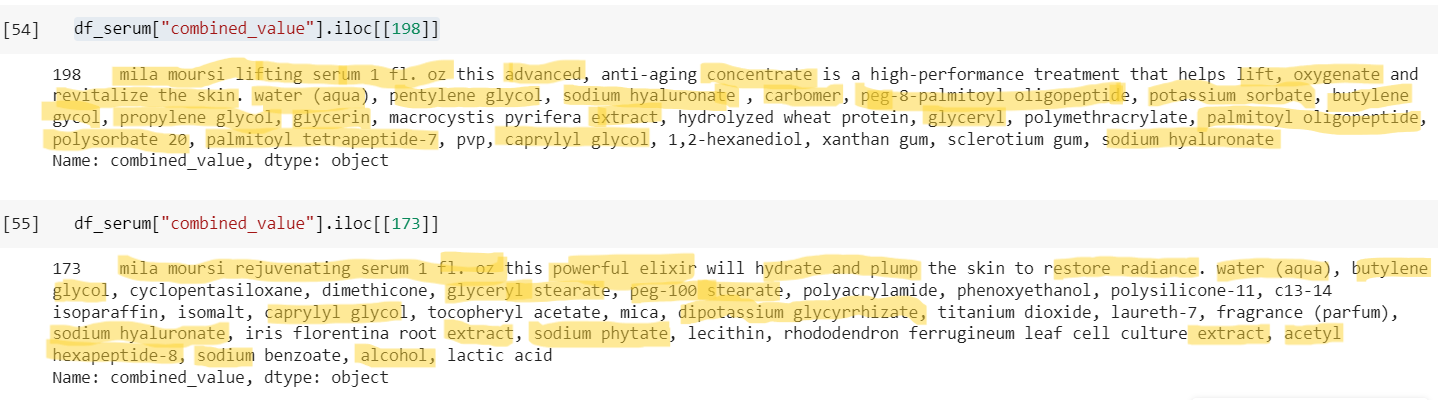